In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

# Data generation
D = 2
x = torch.rand(100,D)
x[:, 0] = x[:, 0] + x[:, 1]
x[:, 1] = 0.5 * x[:, 0] + x[:, 1]

# Encoder
def encoder(x, wEncoder, bEncoder):
    return torch.mm(x, wEncoder) + bEncoder

# Decoder
def decoder(z, wDecoder, bDecoder):
    return z.mm(wDecoder) + bDecoder

# Loss calculator (MSE)
def mse_loss(x_reconstructed, x):
    return torch.mean((x_reconstructed - x) ** 2)

# Trainer
def train(optimizer, x, wEncoder, bEncoder, wDecoder, bDecoder, epochs=1000):
    x_reconstruction = None
    losses = []
    for _ in range(epochs):
        z = encoder(x, wEncoder, bEncoder)
        x_reconstruction = decoder(z, wDecoder, bDecoder)
        loss = mse_loss(x_reconstruction, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return x_reconstruction, losses

# Plotter
def plot_results(x, x_reconstruction, wEncoder):
    plt.scatter(x[:, 0], x[:, 1], color='cyan')
    plt.scatter(x_reconstruction.detach()[:, 0], x_reconstruction.detach()[:, 1])
    plt.plot([0, wEncoder[0, 0].item()], [0, wEncoder[1, 0].item()], '-r')
    plt.axis('equal')
    plt.show()

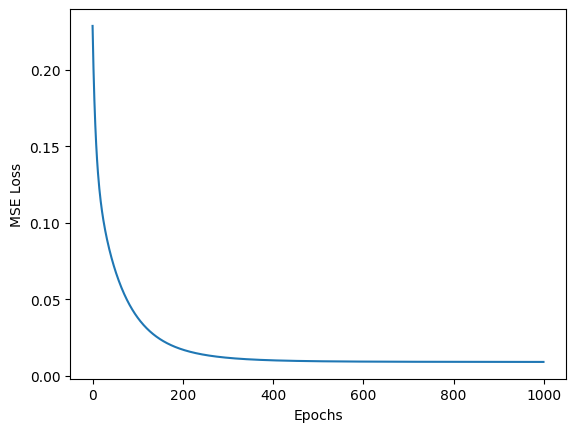

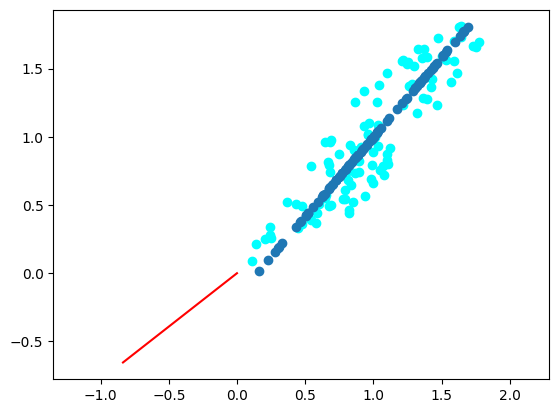

In [2]:
# SGD without momentum
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)
optimizer = optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0)
x_reconstruction, losses = train(optimizer, x, wEncoder, bEncoder, wDecoder, bDecoder)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
plot_results(x, x_reconstruction, wEncoder)

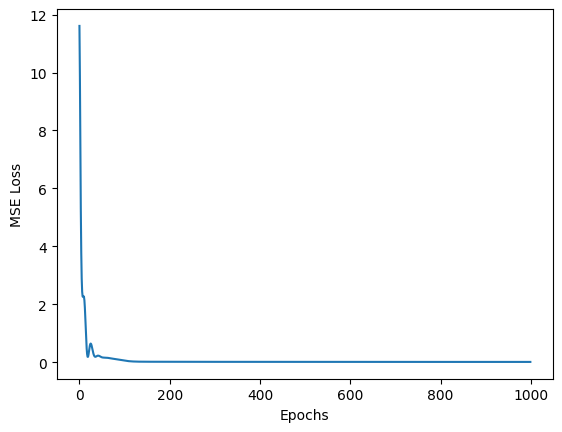

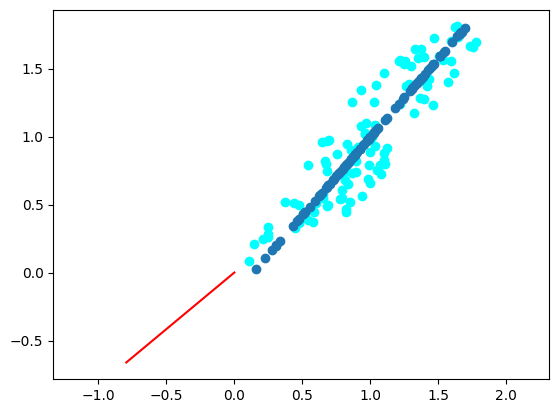

In [3]:
# SGD with momentum
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)
optimizer = optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9)
x_reconstruction, losses = train(optimizer, x, wEncoder, bEncoder, wDecoder, bDecoder)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
plot_results(x, x_reconstruction, wEncoder)

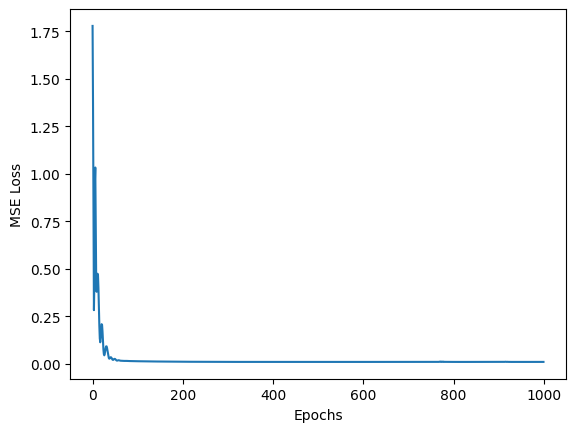

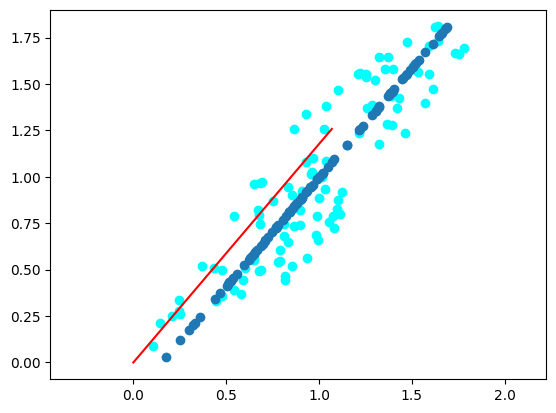

In [4]:
# RMSprop
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)
optimizer = optim.RMSprop([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9)
x_reconstruction, losses = train(optimizer, x, wEncoder, bEncoder, wDecoder, bDecoder)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
plot_results(x, x_reconstruction, wEncoder)